# Predicting NBA Shots

### Učitavanje podataka

In [1]:
import pandas as pd
from statistics import median
file_path = 'shot_logs.csv'
data = pd.read_csv(file_path)

### Priprema podataka

In [2]:
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
data.columns.values

array(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN',
       'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES',
       'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST',
       'FGM', 'PTS', 'player_name', 'player_id'], dtype=object)

In [4]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [5]:
data['LOCATION'] = data['LOCATION'].map({'H': 1, 'A': 0})
data['W'] = data['W'].map({'W': 1, 'L': 0})
data['SHOT_RESULT'] = data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

Vrijednosti LOCATION iz stringa 'H' ili 'A' promjenjene u int 1 ili 0. Vrijednosti W iz stringa 'W' ili 'L' promjenjene u int 1 ili 0. Vrijednosti SHOT_RESULT iz stringa 'made' ili 'missed' promjenjene u int 1 ili 0.

In [6]:
def convert_clock_to_seconds(clock):
    minutes, seconds = map(int, clock.split(':'))
    return minutes * 60 + seconds

data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(convert_clock_to_seconds)

Vrijednosti GAME_CLOCK iz stringa u formatu MM:SS promjenjene u sekunde (int).

In [7]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                        int64
W                               int64
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                      int64
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                     int64
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

In [8]:
data.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

Kandidati za monotoni atribut su GAME_ID i MATCHUP jer svaka utakmica ima jedinstvenu vrijednost. Za sada ću ih izbaciti iz skupa podataka.

In [9]:
data.drop(('GAME_ID'), axis=1, inplace=True)
data.drop(('MATCHUP'), axis=1, inplace=True)

In [10]:
data.isna().sum()

LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

Nedostajuće vrijednosti značajke SHOT_CLOCK ću nadopuniti srednjom vrijednošću.

In [11]:
data.loc[data.SHOT_CLOCK.isna(),'SHOT_CLOCK'] = median(data['SHOT_CLOCK'].dropna())
data.isna().sum()

LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

In [12]:
data.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,0.504377,0.208723,6.506899,2.469427,351.393811,12.446678,2.023355,2.765901,13.571504,2.264670,0.452139,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,0.500001,0.499983,13.233267,4.713260,1.139919,207.590603,5.636698,3.477760,3.043682,8.888964,0.441159,0.497706,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,352.000000,12.300000,1.000000,1.600000,13.700000,2.000000,0.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,1.000000,1.000000,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [13]:
print('Touch time < 0: ', (data.TOUCH_TIME < 0.00).sum())

Touch time < 0:  312


Stršeće vrijednosti značajke TOUCH_TIME ću nadopuniti srednjom vrijednošću.

In [14]:
data.loc[data.TOUCH_TIME < 0.00,'TOUCH_TIME'] = median(data['TOUCH_TIME'].dropna())

In [15]:
data.drop(('FGM'), axis=1, inplace=True)
data.drop(('PTS'), axis=1, inplace=True)
data.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,0.504377,0.208723,6.506899,2.469427,351.393811,12.446678,2.023355,2.775855,13.571504,2.264670,0.452139,159038.487284,4.123015,157238.251247
std,0.500001,0.499983,13.233267,4.713260,1.139919,207.590603,5.636698,3.477760,2.984121,8.888964,0.441159,0.497706,78791.172947,2.756446,79362.389336
min,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,708.000000,0.000000,708.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,101162.000000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,352.000000,12.300000,1.000000,1.600000,13.700000,2.000000,0.000000,201949.000000,3.700000,201939.000000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,202704.000000
max,1.000000,1.000000,53.000000,38.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,204060.000000


### Vizualizacija podataka

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(15, 10))

# features_to_plot = ['FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']
# for feature in features_to_plot:
#     plt.subplot(3, 3, features_to_plot.index(feature) + 1)
#     sns.histplot(data[feature], bins=30)
#     plt.title(f'Histogram: {feature}')

# plt.tight_layout()
# plt.show()


In [18]:
# plt.figure(figsize=(15, 5))
# sns.lineplot(x='GAME_CLOCK', y='SHOT_NUMBER', data=data).invert_xaxis()
# plt.title('Linijski dijagram: Broj šuteva tijekom vremena')
# plt.xlabel('Sekunde do kraja četvrtine')
# plt.ylabel('Broj šuteva')
# plt.show()

In [19]:
# plt.figure(figsize=(15, 10))

# for i, feature in enumerate(['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']):
#     plt.subplot(2, 2, i + 1)
#     sns.scatterplot(x=feature, y='SHOT_CLOCK', hue='SHOT_RESULT', data=data)
#     plt.title(f'Točkasti dijagram: {feature} u ovisnosti o SHOT_RESULT')
#     plt.legend(['Missed', 'Made'])

# plt.tight_layout()
# plt.show()


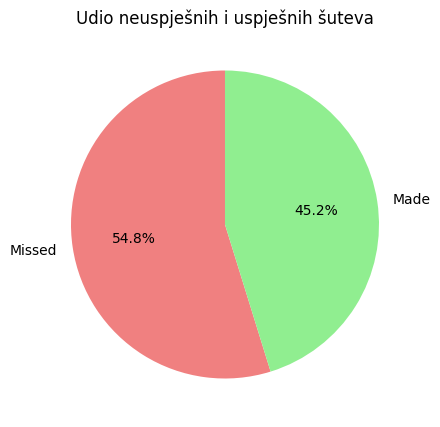

In [20]:
shot_result_counts = data['SHOT_RESULT'].value_counts()
labels = ['Missed', 'Made']
sizes = shot_result_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Udio neuspješnih i uspješnih šuteva')
plt.show()

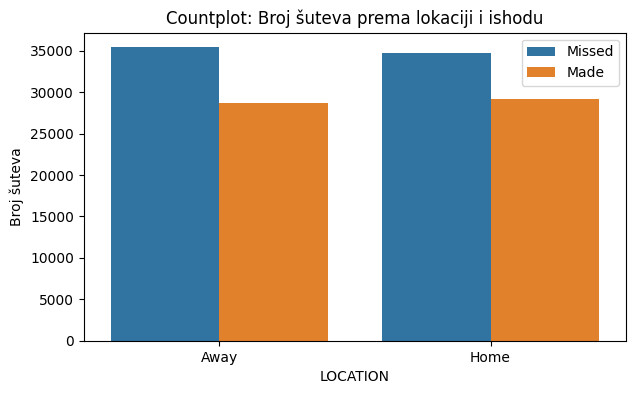

In [21]:
plt.figure(figsize=(7, 4))
sns.countplot(x='LOCATION', data=data, hue='SHOT_RESULT')
plt.title('Countplot: Broj šuteva prema lokaciji i ishodu')
plt.xlabel('LOCATION')
plt.ylabel('Broj šuteva')
plt.xticks([0, 1], ['Away', 'Home'])
plt.legend(['Missed', 'Made'])
plt.show()

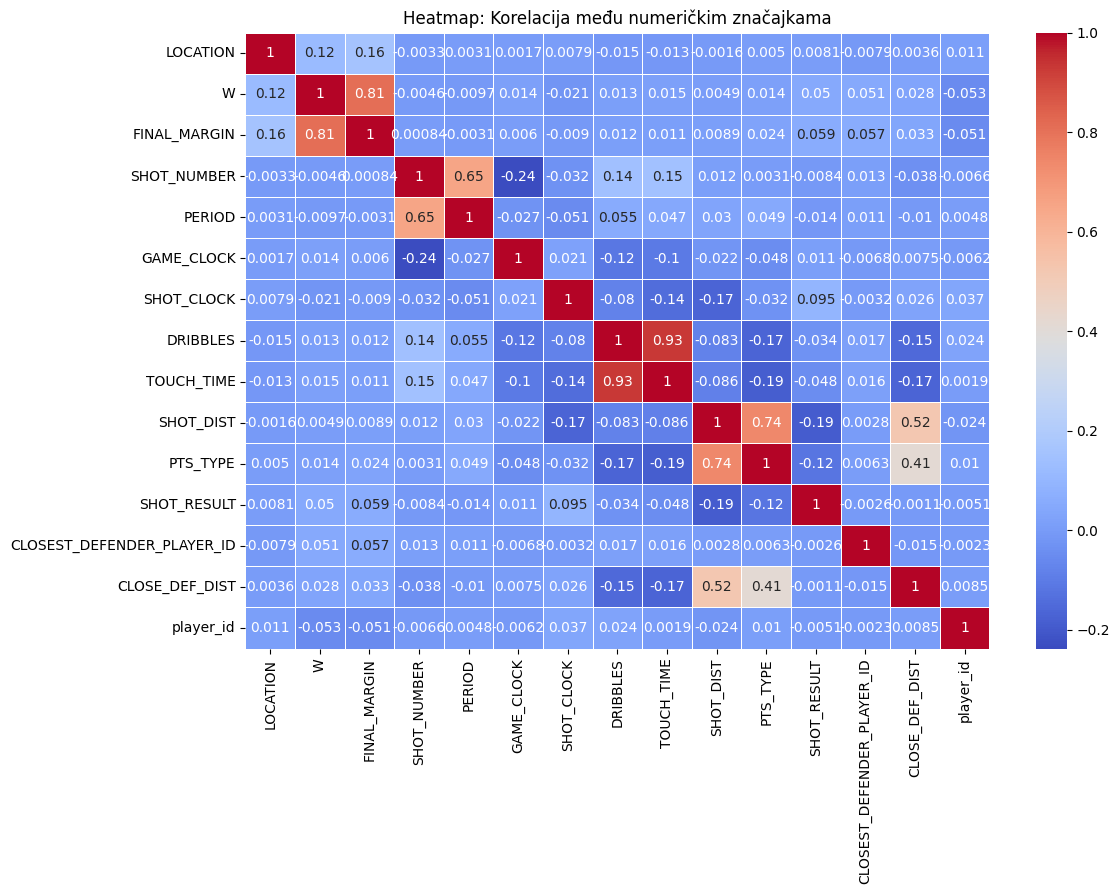

In [22]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap: Korelacija među numeričkim značajkama')
plt.show()


### Logistička regresija

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [24]:

data1 = data.copy()

data1['TOTAL_GAME_TIME'] = data1['PERIOD'] + data1['GAME_CLOCK']

data1 = data1.drop(['PERIOD', 'GAME_CLOCK'], axis=1)

continous_features = ['TOTAL_GAME_TIME', 'SHOT_CLOCK', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']

scaler = StandardScaler()

data1[continous_features] = scaler.fit_transform(data1[continous_features])

data_logreg = data1.copy()

data_logreg['SHOT_RESULT'] = data_logreg['SHOT_RESULT'].replace({0: -1, 1: 1})

In [25]:
features = ['LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'TOTAL_GAME_TIME', 'SHOT_CLOCK',
            'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']

target = 'SHOT_RESULT'

X_train, X_test, y_train, y_test = train_test_split(data_logreg[features], data_logreg[target], test_size=0.05)

In [26]:
model = LogisticRegression(penalty='l2', C=10000, max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(C=10000, max_iter=10000)

In [27]:
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Točnost: {accuracy}')
print(f'Matrica konfuzije:\n{conf_matrix}')


Točnost: 0.6116489693941287
Matrica konfuzije:
[[2567  968]
 [1519 1350]]


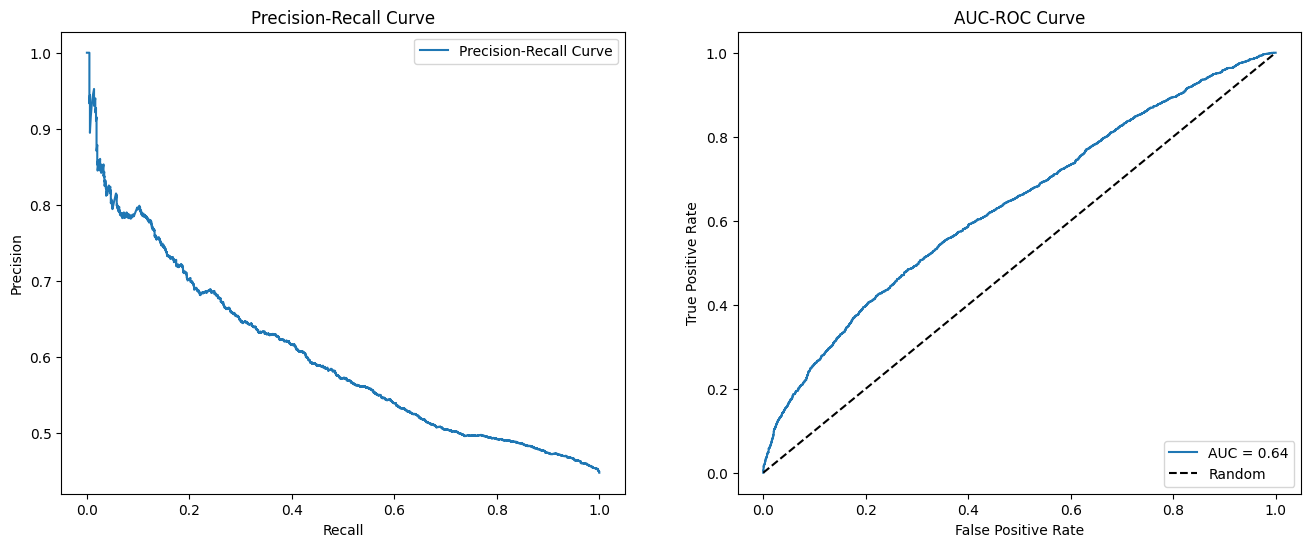

In [28]:
y_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')

### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
sampled_data1 = data1.sample(n=40000)
data_svm = sampled_data1.copy()
X_train, X_test, y_train, y_test = train_test_split(data_svm[features], data_svm[target], test_size=0.05)

In [31]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
predictions = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions)
conf_matrix_svm = confusion_matrix(y_test, predictions)

print(f'Točnost SVM modela: {accuracy_svm}')
print(f'Matrica konfuzije SVM modela:\n{conf_matrix_svm}')

Točnost SVM modela: 0.6005
Matrica konfuzije SVM modela:
[[748 372]
 [427 453]]


### Neuronske mreže

In [33]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [34]:
sampled_data2 = data1.sample(n=90000)
data_nn = sampled_data2.copy()
X_train, X_test, y_train, y_test = train_test_split(data_nn[features], data_nn[target], test_size=0.05)

In [35]:
model_sigmoid_both = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))
])

model_sigmoid_both.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5.0), loss='binary_crossentropy', metrics=['accuracy'])

model_sigmoid_both.fit(X_train, y_train, epochs=10, batch_size=1000)

model_relu_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))
])

model_relu_sigmoid.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5.0), loss='binary_crossentropy', metrics=['accuracy'])

model_relu_sigmoid.fit(X_train, y_train, epochs=10, batch_size=1000)


Epoch 1/10


86/86 [==============================] - 2s 4ms/step - loss: 0.8667 - accuracy: 0.5385
Epoch 2/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5608
Epoch 3/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5811
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5989
Epoch 5/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5981
Epoch 6/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6024
Epoch 7/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6021
Epoch 8/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6033
Epoch 9/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6021
Epoch 10/10
86/86 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6038
Epoch 1/10
86/86

In [36]:
predictions_sigmoid_both = model_sigmoid_both.predict(X_test)
predictions_sigmoid_both = (predictions_sigmoid_both > 0.5).astype(int)

predictions_relu_sigmoid = model_relu_sigmoid.predict(X_test)
predictions_relu_sigmoid = (predictions_relu_sigmoid > 0.5).astype(int)

141/141 [==============================] - 0s 2ms/step


In [37]:
accuracy_sigmoid_both = accuracy_score(y_test, predictions_sigmoid_both)
print(f'Točnost za model s dvije sigmoide: {accuracy_sigmoid_both}')

conf_matrix_sigmoid_both = confusion_matrix(y_test, predictions_sigmoid_both)
print(f'Matrica konfuzije za model s dvije sigmoide:\n{conf_matrix_sigmoid_both}')

Točnost za model s dvije sigmoide: 0.5802222222222222
Matrica konfuzije za model s dvije sigmoide:
[[2295  147]
 [1742  316]]


In [39]:
accuracy_relu_sigmoid = accuracy_score(y_test, predictions_relu_sigmoid)
print(f'Točnost za model sa sigmoidom i ReLU: {accuracy_relu_sigmoid}')

conf_matrix_relu_sigmoid = confusion_matrix(y_test, predictions_relu_sigmoid)
print(f'Matrica konfuzije za model sa sigmoidom i ReLU:\n{conf_matrix_relu_sigmoid}')

Točnost za model sa sigmoidom i ReLU: 0.5426666666666666
Matrica konfuzije za model sa sigmoidom i ReLU:
[[2442    0]
 [2058    0]]


### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
data2 = data.copy()
sampled_data3 = data2.sample(n=100000)
data_nb = sampled_data3.copy()

In [43]:
features = ['LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK',
            'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST',
            'CLOSEST_DEFENDER_PLAYER_ID','player_id']

target = 'SHOT_RESULT'

X_train, X_test, y_train, y_test = train_test_split(data2[features], data2[target], test_size=0.05)

In [44]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [45]:
predictions = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Točnost Naive Bayes modela: {accuracy}')
print(f'Matrica konfuzije Naive Bayes modela:\n{conf_matrix}')

Točnost Naive Bayes modela: 0.59946908182386
Matrica konfuzije Naive Bayes modela:
[[2527 1004]
 [1561 1312]]


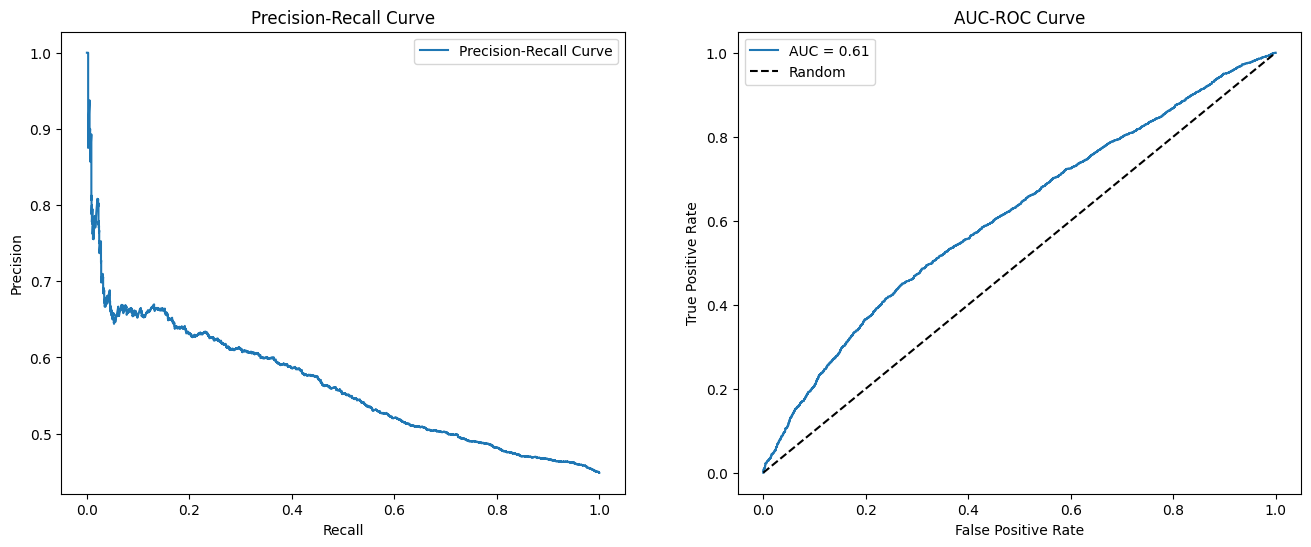

In [46]:
y_proba = naive_bayes_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
random_forest_model = RandomForestClassifier(n_estimators=80, min_samples_leaf=50, bootstrap=True)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=80)

In [49]:
predictions = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Točnost Random Forest modela: {accuracy}')
print(f'Matrica konfuzije Random Forest modela:\n{conf_matrix}')

Točnost Random Forest modela: 0.6250780762023735
Matrica konfuzije Random Forest modela:
[[2949  582]
 [1819 1054]]


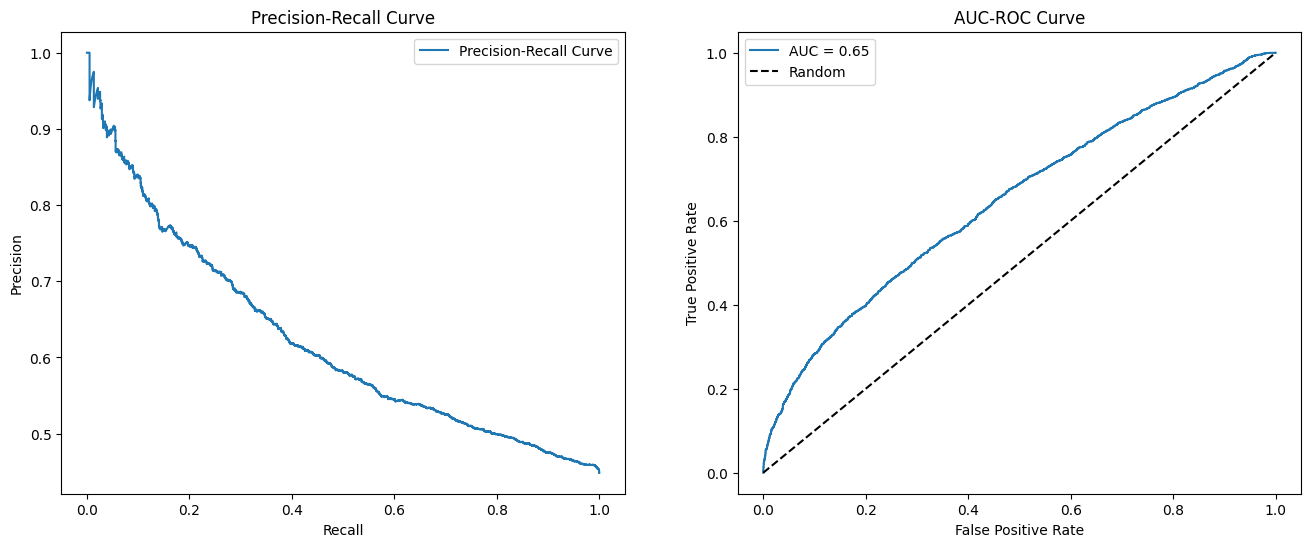

In [50]:
y_proba = random_forest_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()

### Boosting

In [51]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [67]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.0001, 0.001, 0.01],  
    'max_depth': [3, 5, 7],
    'min_child_weight': [0.0001, 0.001, 0.01]
}


In [68]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Optimalni parametri:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
predictions = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Optimalni parametri: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0.0001, 'n_estimators': 150}


In [70]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Točnost XGBoost modela: {accuracy}')
print(f'Matrica konfuzije XGBoost modela:\n{conf_matrix}')

Točnost XGBoost modela: 0.6249219237976265
Matrica konfuzije XGBoost modela:
[[3126  405]
 [1997  876]]


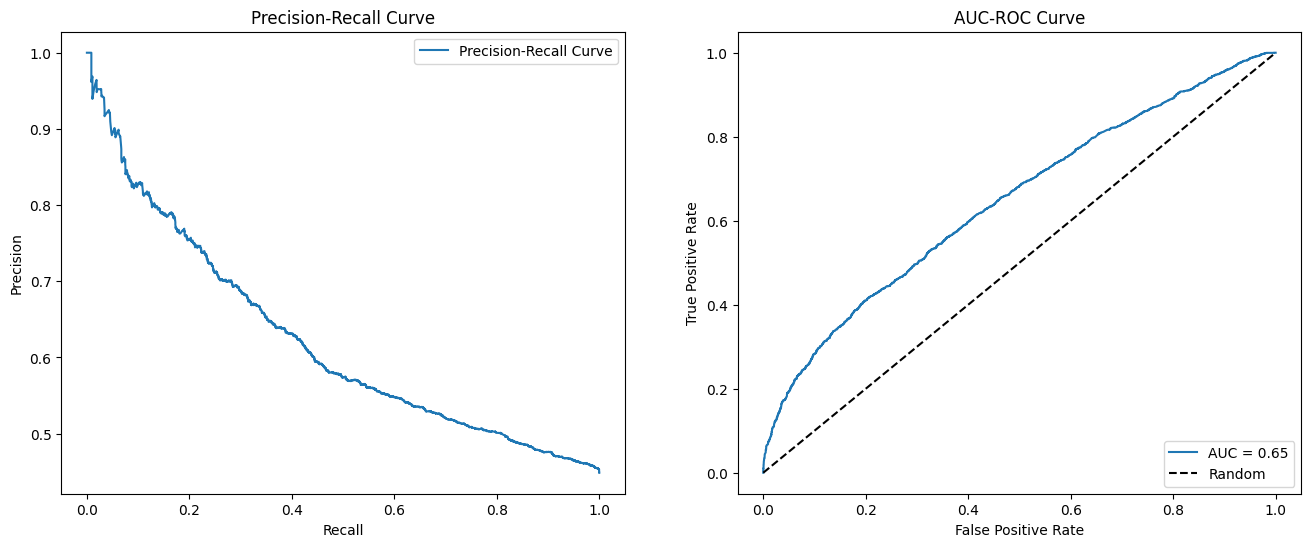

In [71]:
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
